# Solar Coordinates with SunPy

In this session we will use the AIA and STEREO image we downloaded in the last session do a quick demonstration of converting between different coordinates in SunPy. A different version of this example can be found in the [SunPy Gallery](http://docs.sunpy.org/en/stable/generated/gallery/tutorials/SDO_to_STEREO_Coordinate_Conversion.html).

## Useful Links

1. [SunPy Coordinates Documentation](http://docs.sunpy.org/en/stable/code_ref/coordinates.html)
1. ["Coordinate systems for solar image data" - Thompson (2006)](http://dx.doi.org/10.1051/0004-6361:20054262)
1. [wcsaxes Documentation](http://wcsaxes.readthedocs.org/)
1. [Astropy Coordinates Documentation](http://docs.astropy.org/en/stable/coordinates/index.html)

## Reading the Data

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

import astropy.units as u
import sunpy.map

In [ ]:
files = ['./data/20110101_000615_n4eub.fts', './data/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.fits']

In [ ]:
euvi, aia = sunpy.map.Map(files)

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=aia)
aia.plot(axes=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=euvi)
euvi.plot(axes=ax2)

## Helioprojective and Heliographic Coordinates

<div style="float:left; width:59%">
<h3>Helioprojective "Cartesian" Coordinates</h3>
<p>
The most common coordinate frame in solar physics is helioprojective cartesian, HPC, which is an observer centric spherical coordinate frame with the point of 0° longitude and 0° latitude aligned with the centre of the solar disk. Normally the radius (distance from the observer) is not known when imaging the sky.
</p>
<p>
These coordinates are commonly referred to as "Solar-x Solar-y", as they appear to be cartesian when dealing with small angles on the solar disk (see image on the right).
</p>
<h3> Heliocentric (Stonyhurst) Coordinates</h3>
<p>
Heliocentric coordinates, unlike helioprojective, have the origin at the centre of the Sun. The line of 0° longitude is aligned with the position of the Earth and the line of 0° latitude is around the solar equator. These coordinates are used to give positions on the Sun independant of the observer location.
</p>
</div>
<div style="float:left; width:39%">
<img src="coord_inset.png" width=100% />
</div>

SunPy can convert between these two coordinate systems:

In [ ]:
import sunpy.coordinates
from astropy.coordinates import SkyCoord

In [ ]:
coord1 = SkyCoord(100*u.arcsec, 500*u.arcsec, frame=aia.coordinate_frame)
coord1

In [ ]:
coord1.transform_to("heliographic_stonyhurst")

You can also plot points in both systems (coordinates should be specified in degrees to matplotlib):

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=aia)
aia.plot(axes=ax)
ax.plot(0.02, 0.13, 'bo', transform=ax.get_transform('helioprojective'))
ax.plot(6, 27, 'go', transform=ax.get_transform('heliographic_stonyhurst'))

## Converting from SDO to STEREO

In this example we are going to take a point in an AIA image, convert it to heliographic coordinates then calculate that point in helioprojective coordinates from the point of view of STEREO.

*Note: This will be much easier in SunPy 0.8*

In [ ]:
aia_hpc = SkyCoord(-711*u.arcsec, -217*u.arcsec, frame=aia.coordinate_frame)
aia_hpc

In [ ]:
hgs = aia_hpc.transform_to('heliographic_stonyhurst')
hgs

In [ ]:
euvi_hpc = hgs.transform_to(euvi.coordinate_frame)
euvi_hpc

## Coordinates and Plotting Exercise

As an exercise for you to work on either until 5pm or in your own time, we can use this AIA <> STEREO coordinate transformation to highlight a region in both images, for this exercise take a box with width of $200"$ and a height of $250"$ and a coordinate of the bottom left of the box of $(-800, -300)"$.

1. Use SunPy coordinates to convert the four corner points of this box to the EUVI helioprojective coordinate frame and then plot the same box on the EUVI image.
2. Create a submap of the AIA and EUVI image showing the same region of the solar atmosphere. Use the AIA box coordinates and your calculated EUVI coordinates.
3. Plot both the submaps next to each other, in the same way as we plotted the EUVI and AIA image together at the start of this session.

To get you started this is a plot of the box:

In [8]:
aia_width = 200 * u.arcsec
aia_height = 250 * u.arcsec
aia_bottom_left = (-800, -300) * u.arcsec

<IPython.core.display.Javascript object>


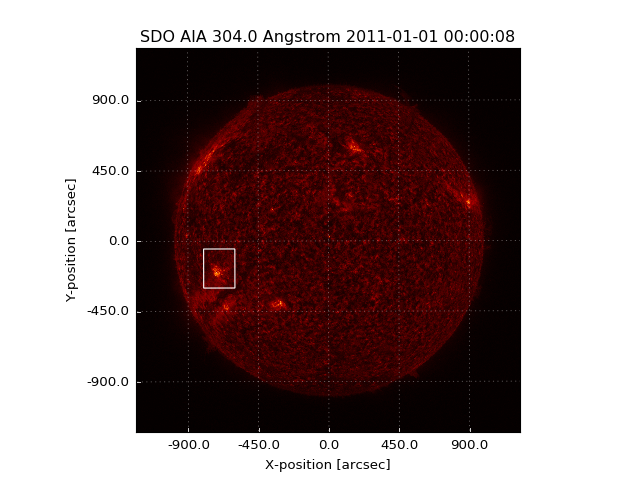

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=aia)
aia.plot(axes=ax)
aia.draw_rectangle(aia_bottom_left, aia_width, aia_height)

If you want some hints, this is the same task as this example in the SunPy gallery: [SDO to STEREO Coordinate Conversion](http://docs.sunpy.org/en/stable/generated/gallery/tutorials/SDO_to_STEREO_Coordinate_Conversion.html).

If you want you might be able to find another example in the [SunPy Gallery](http://docs.sunpy.org/en/stable/generated/gallery/) which is more applicable to your work, feel free to work through that instead.

# NOTE: If you want to save your work, remember to download the notebook.